# playpen.py → playpen.ipynb

This notebook is an interactive version of the original `playpen.py` script. It demonstrates trading system initialization, MetaTrader5 connection, data analysis, and plotting logic using the `algotrader` package.

---

**Sections:**
1. Read playpen.py Source Code
2. Convert Python Script to Jupyter Notebook Cells
3. Save as playpen.ipynb
4. Verify Notebook Content

---

In [1]:
# --- Imports and Initialization ---
import time
_start = time.time()
_startPy = time.time()

import algotrader as at
from algotrader._utils import _sprintf
gAccount = 'RF5D03'
gVol = 0.1

from datetime import timezone
from datetime import datetime
from datetime import timedelta

_deltamsPy = int((time.time()-_startPy)*1000)

In [2]:
# --- MetaTrader5 Initialization ---
_startMt5 = time.time()

gH = at.Algotrader(gAccount)

# TODO: adjust for your time zone
# winter time
gH.tdOffset= timedelta(hours=2)
# summer time
#gH.tdOffset= timedelta(hours=3)

# check if connection to MetaTrader 5 successful
if not gH.mt5_init():
    raise( "E: mt5_init failed")

gDtTo   = None
if None == gDtTo:
    gDtTo = datetime.now(timezone.utc) + gH.tdOffset

In [3]:
# --- Set Initial Prices for Symbols ---
for sym in gH.cf_symbols[gH.gACCOUNT]: 
    if None == gH.g_c0[sym]:
        gH.set_gc0_price(sym)

_deltamsMt5 = int((time.time()-_startMt5)*1000)

EURUSD 1.16622 set new base line - start point - gc0 price


SYMBOL EURUSD
        DELTA    PS   OC   HL  VOLS    TD    TT  SPREAD  OC/HL  VOLS/TD  \
T60         0     9    7   14    60   124  2067       1    0.5      0.5   
T300        0     3   25   45   300   274   913       1    0.6      1.1   
T900        0    41   -7   79   900   943  1048      12    0.1      1.0   
T3600       0 -1135  175  213  3600  5167  1435      12    0.8      0.7   
S60        -2     6    0   14    40    66  1650       0    0.0      0.6   
S300       -2     3   26   38   157   299  1904       1    0.7      0.5   
S900       -2    29  -13   79   723   900  1245      12    0.2      0.8   
S3600      -2    74  165  208  2708  3604  1331      12    0.8      0.8   
SUMROW     -1  -121   47   86  1061  1422  1449       6    0.5      0.8   

        HL/TD  SUMCOL  
T60       0.1     1.1  
T300      0.2     1.9  
T900      0.1     1.2  
T3600     0.0     1.5  
S60       0.2     0.8  
S300      0.1     1.3  
S900      0.1     1.1  
S3600     0.1     1.7  
SUMROW    0.1     1

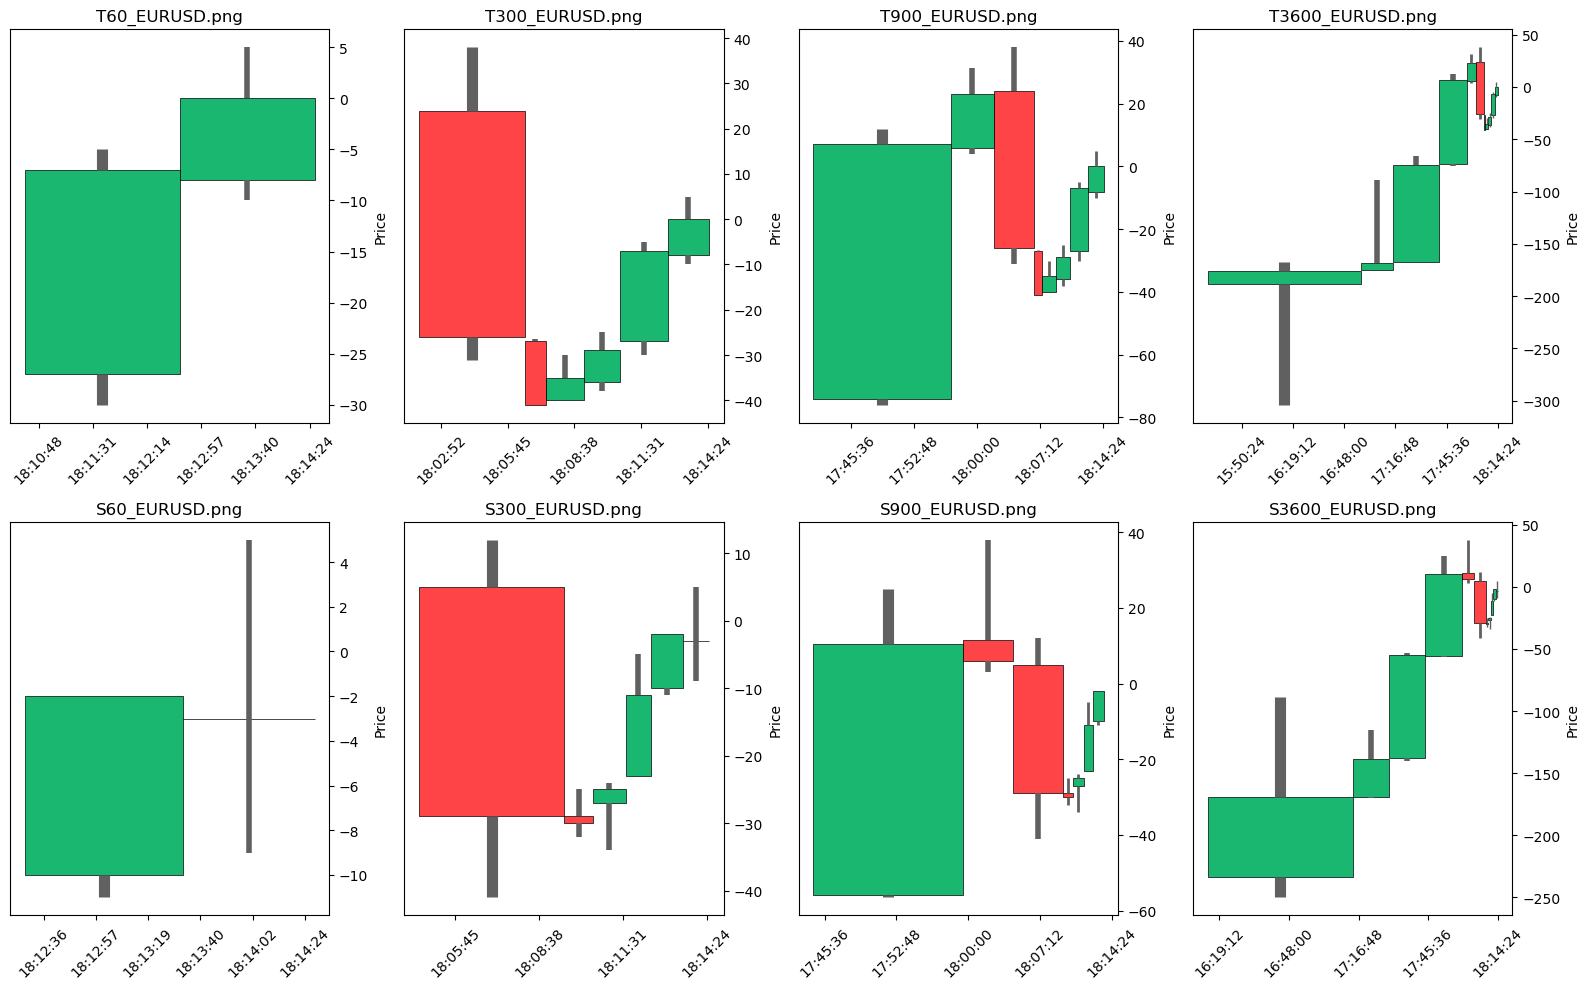

 deltams(ALL):  4873  deltams(SHOW):  1755


In [4]:
# --- Main Analysis Loop ---
rangenumber = 1
timeoffsetInS = 0

for cnt in range(rangenumber):
    tdoffset = timedelta(seconds=(cnt*timeoffsetInS))
    dt = gDtTo + tdoffset
    gH.get_date_range(dt)
    for sym in gH.cf_symbols[gH.gACCOUNT]: 
        print('SYMBOL', sym)
        _startTicks = time.time()
        gH.get_ticks_and_rates(sym)
        _deltamsTicks = int((time.time()-_startTicks)*1000)
        _startAna = time.time()
        dfana = gH.analyse_df(sym)
        gH.print_analyse_df(dfana)
        outstr = _sprintf("%5d %s %5d %5d %6.1f ", cnt, gH.gDt['dt_to'], dfana.DELTA.SUMROW, (dfana.OC.SUMROW+dfana.PS.SUMROW)/2, dfana.SUMCOL.SUMROW)
        print(outstr)
        _deltamsAna = int((time.time()-_startAna)*1000)
        gH.mt5_position_sltp_follow2(sym)
        _startPlot = time.time()
        gH.print_fig_all_periods_per_sym_NEW(sym)
        _deltamsPlot = int((time.time()-_startPlot)*1000)

In [5]:
# --- Timing and Summary Output ---
_deltams = int((time.time()-_start)*1000)
print(" deltams(ALL): ", _deltams, " deltams(PY): ", _deltamsPy, " deltams(MT5): ", _deltamsMt5, " deltams(TICKS): ", _deltamsTicks, " deltams(ANA): ", _deltamsAna, " deltams(PLOT): ", _deltamsPlot)

 deltams(ALL):  11124  deltams(PY):  2660  deltams(MT5):  2090  deltams(TICKS):  1207  deltams(ANA):  213  deltams(PLOT):  4873


---

## Additional Trading Logic (from playpen.py, commented out)

The following code block contains additional trading logic and plotting routines from the original script. Uncomment and adapt as needed for your workflow.

In [6]:
# (Commented block from playpen.py)
'''
gSym = 'EURUSD'

op, dfbs = gH.mt5_cnt_orders_and_positions( gSym )
print( dfbs )

bs_threshold = 20

buy_or_sell = 'neutral'
if 1*bs_threshold < dfana.PS.SUMROW and 1*bs_threshold < dfana.OC.SUMROW:
    buy_or_sell = 'buy'

if -1*bs_threshold > dfana.PS.SUMROW and -1*bs_threshold > dfana.OC.SUMROW:
    buy_or_sell = 'sell'

if 'buy' == buy_or_sell:
    if 1 == dfbs.cnt.POS_BUY and 0 == dfbs.cnt.POS_SELL:
        print(buy_or_sell, ' - do nothing')    
    elif 0 == dfbs.cnt.POS_BUY and 1 == dfbs.cnt.POS_SELL:
        gH.set_gc0()
        gH.mt5_position_reverse( gSym )
        gH.mt5_pending_order_remove(gSym)
        gH.mt5_pending_order_sell_limit(\
            gSym, volume = 0.01, startoffset= 10, number = 10, offsetpar = 2, price = gH.g_c0[gSym])
    elif 0 == dfbs.cnt.POS_BUY and 0 == dfbs.cnt.POS_SELL:
        gH.set_gc0()
        gH.mt5_position_buy(gSym, gVol)
        gH.mt5_pending_order_remove(gSym)
        gH.mt5_pending_order_sell_limit(\
            gSym, volume = 0.01, startoffset= 10, number = 10, offsetpar = 2, price = gH.g_c0[gSym])
    else:
        gH.set_gc0()
        gH.mt5_position_close(gSym)    
        gH.mt5_position_buy(gSym, gVol)
        gH.mt5_pending_order_remove(gSym)
        gH.mt5_pending_order_sell_limit(\
            gSym, volume = 0.01, startoffset= 10, number = 10, offsetpar = 2, price = gH.g_c0[gSym])

elif 'sell' == buy_or_sell:
    if 0 == dfbs.cnt.POS_BUY and 1 == dfbs.cnt.POS_SELL:
        print(buy_or_sell, ' - do nothing')    
    elif 1 == dfbs.cnt.POS_BUY and 0 == dfbs.cnt.POS_SELL:
        gH.set_gc0()
        gH.mt5_position_reverse( gSym )
        gH.mt5_pending_order_remove(gSym)
        gH.mt5_pending_order_buy_limit(\
            gSym, volume = 0.01, startoffset= 10, number = 10, offsetpar = 2, price = gH.g_c0[gSym])
    elif 0 == dfbs.cnt.POS_BUY and 0 == dfbs.cnt.POS_SELL:
        gH.set_gc0()
        gH.mt5_position_sell(gSym, gVol)
        gH.mt5_pending_order_remove(gSym)
        gH.mt5_pending_order_buy_limit(\
            gSym, volume = 0.01, startoffset= 10, number = 10, offsetpar = 2, price = gH.g_c0[gSym])
    else:
        gH.set_gc0()
        gH.mt5_position_close(gSym)    
        gH.mt5_position_sell(gSym, gVol)
        gH.mt5_pending_order_remove(gSym)
        gH.mt5_pending_order_buy_limit(\
            gSym, volume = 0.01, startoffset= 10, number = 10, offsetpar = 2, price = gH.g_c0[gSym])

elif 'neutral' == buy_or_sell:
    print(buy_or_sell, ' - do nothing')    

gH.mt5_position_sltp_follow2( gSym )

endticks = time.time()

gH.print_fig_all_periods_per_sym()

end = time.time()
dt_to_str =   str(gDtTo.strftime("%Y%m%d_%H%M%S"))  
print( _sprintf("%s TOTAL TIME [%.2gs %.2gs %.2gs]\n", dt_to_str, (end-start), (endticks-start), (end-endticks)   ))
'''


'\ngSym = \'EURUSD\'\n\nop, dfbs = gH.mt5_cnt_orders_and_positions( gSym )\nprint( dfbs )\n\nbs_threshold = 20\n\nbuy_or_sell = \'neutral\'\nif 1*bs_threshold < dfana.PS.SUMROW and 1*bs_threshold < dfana.OC.SUMROW:\n    buy_or_sell = \'buy\'\n\nif -1*bs_threshold > dfana.PS.SUMROW and -1*bs_threshold > dfana.OC.SUMROW:\n    buy_or_sell = \'sell\'\n\nif \'buy\' == buy_or_sell:\n    if 1 == dfbs.cnt.POS_BUY and 0 == dfbs.cnt.POS_SELL:\n        print(buy_or_sell, \' - do nothing\')    \n    elif 0 == dfbs.cnt.POS_BUY and 1 == dfbs.cnt.POS_SELL:\n        gH.set_gc0()\n        gH.mt5_position_reverse( gSym )\n        gH.mt5_pending_order_remove(gSym)\n        gH.mt5_pending_order_sell_limit(            gSym, volume = 0.01, startoffset= 10, number = 10, offsetpar = 2, price = gH.g_c0[gSym])\n    elif 0 == dfbs.cnt.POS_BUY and 0 == dfbs.cnt.POS_SELL:\n        gH.set_gc0()\n        gH.mt5_position_buy(gSym, gVol)\n        gH.mt5_pending_order_remove(gSym)\n        gH.mt5_pending_order_sell_lim